In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('./climate_change_data.csv',parse_dates=['Date'])

In [3]:
df

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


In [11]:
# Group data by year and calculate average temperature
yearly_avg_temp = df.groupby(df['Date'].dt.year)['Temperature'].mean()

### Explore Global Temperature Changes Over Time

In [15]:
yearly_avg_temp

Date
2000    15.029889
2001    14.941470
2002    14.632097
2003    15.156629
2004    15.281254
2005    15.393362
2006    14.914295
2007    15.209550
2008    14.827236
2009    14.484853
2010    14.767072
2011    15.107760
2012    14.542392
2013    14.966602
2014    15.193593
2015    14.575473
2016    15.033052
2017    14.853962
2018    14.647893
2019    15.096462
2020    15.108094
2021    15.130248
2022    14.635067
Name: Temperature, dtype: float64

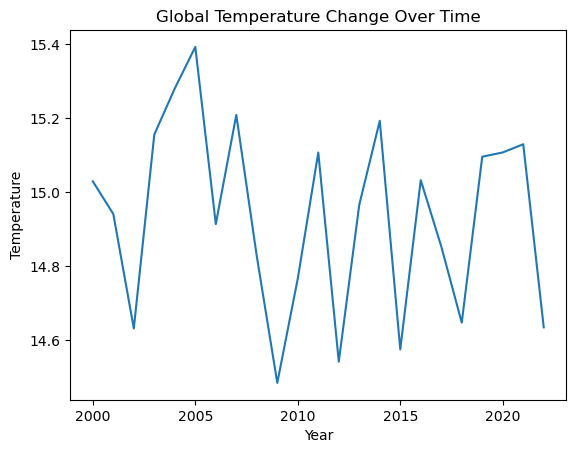

In [16]:
# Plot global temperature changes over time
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Global Temperature Change Over Time')
plt.show()

In [18]:
# Group data by country and calculate temperature change
country_avg_temp = df.groupby('Country')['Temperature'].mean()

In [19]:
country_avg_temp

Country
Afghanistan          14.730345
Albania              15.646637
Algeria              14.496989
American Samoa       15.895872
Andorra              15.074974
                       ...    
Wallis and Futuna    14.827670
Western Sahara       15.386609
Yemen                15.140053
Zambia               14.706316
Zimbabwe             15.000557
Name: Temperature, Length: 243, dtype: float64

### Analyze Temperature Changes Among Different Countries or Regions:

In [20]:
# Identify countries with the highest temperature increases and decreases
countries_highest_increase = country_avg_temp.nlargest(5)
countries_highest_decrease = country_avg_temp.nsmallest(5)

In [21]:
countries_highest_increase

Country
United States of America    17.280005
Saint Martin                16.989042
Niger                       16.963188
Turks and Caicos Islands    16.924763
Switzerland                 16.519842
Name: Temperature, dtype: float64

In [22]:
countries_highest_decrease

Country
Kazakhstan         12.554785
Solomon Islands    12.837809
Sweden             12.865208
Poland             13.087618
Serbia             13.409504
Name: Temperature, dtype: float64

### Examine the Correlation Between CO2 Emissions and Temperature Changes:

In [24]:
# Calculate correlation coefficient between CO2 emissions and temperature
correlation = df['CO2 Emissions'].corr(df['Temperature'])

In [25]:
correlation

-0.002775249397292701

### Investigate Sea Level Rise:

In [26]:
# Calculate average sea level rise over time
avg_sea_level_rise = df.groupby(df['Date'].dt.year)['Sea Level Rise'].mean()

# Identify countries or regions with the most pronounced sea level rise
countries_most_sea_level_rise = df.groupby('Country')['Sea Level Rise'].mean().nlargest(5)

In [27]:
avg_sea_level_rise

Date
2000    0.066779
2001    0.021331
2002   -0.103499
2003    0.033171
2004    0.098114
2005   -0.028545
2006   -0.042107
2007    0.052351
2008   -0.137645
2009   -0.071911
2010    0.049735
2011   -0.001791
2012   -0.073253
2013   -0.004936
2014    0.051262
2015    0.017220
2016   -0.039448
2017    0.101533
2018    0.050916
2019   -0.032968
2020   -0.055686
2021   -0.020838
2022   -0.002013
Name: Sea Level Rise, dtype: float64

In [28]:
countries_most_sea_level_rise

Country
Ecuador           0.486669
Tokelau           0.415068
Maldives          0.403618
Norfolk Island    0.394078
Portugal          0.375638
Name: Sea Level Rise, dtype: float64

### Explore Precipitation Variation

In [30]:
# Group data by country and calculate average precipitation
country_avg_precipitation = df.groupby('Country')['Precipitation'].mean()


In [45]:
# Identify countries with notable changes in rainfall patterns over time
countries_notable_rainfall_changes = country_avg_precipitation.std().nlargest(5)

AttributeError: 'float' object has no attribute 'nlargest'

In [34]:
country_avg_precipitation.std().nlargest(5)

AttributeError: 'float' object has no attribute 'nlargest'

### Investigate the Correlation Between Humidity and Temperature Changes:

In [35]:
# Calculate correlation coefficient between humidity and temperature
correlation_humidity_temp = df['Humidity'].corr(df['Temperature'])


In [36]:
correlation_humidity_temp

-0.015736754147136003

### Analyze Changes in Wind Speed:

In [37]:
# Group data by year and calculate average wind speed
yearly_avg_wind_speed = df.groupby(df['Date'].dt.year)['Wind Speed'].mean()

# Identify countries or regions with significant changes in wind speed
countries_notable_wind_speed_changes = df.groupby('Country')['Wind Speed'].std().nlargest(5)


### Explore Seasonal Variations:

In [40]:
# Group data by month and calculate average temperature and precipitation
monthly_avg_temp = df.groupby(df['Date'].dt.month)['Temperature'].mean()
monthly_avg_precipitation = df.groupby(df['Date'].dt.month)['Precipitation'].mean()


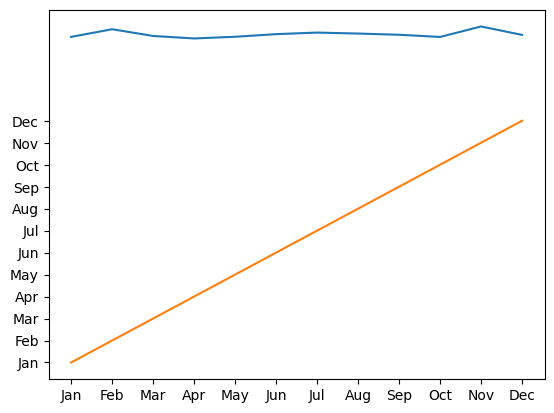

In [43]:
# Plot seasonal variations in temperature and precipitation
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, monthly_avg_temp.values, label='Temperature')
plt.plot(months)
